## Effects of Loan Characterics on Borrower's APR

##### by Lamia Alruhaimi

## Investigation Overview

In this presentation. Many visualizations will be generated on loan characteristics for the annual interest rate of borrowers. Key features are BorrowerAPR, ProsperScore, AvailableBankcardCredit, and CreditScoreRangeUpper.


## Dataset Overview

The dataset contains 113,917 loans, each row includes information on the borrow's APR, status, borrowed amount, debt, etc. This investigation will analyze the factors affecting theborrow's APR of borrowing and how each loan was taken out by which type of borrowers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [2]:
# load in the dataset into a pandas dataframe
# expand maximun number of columns and row dosplayed

pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

df_loan = pd.read_csv('ProsperLoanData.csv')

In [3]:
# data wrangling


# filter out loans without ProsperScores
df_loan_2 = df_loan[df_loan['ProsperScore'].isnull()==False]

# remove unwanted columns and columns with many empty values
df_loan_2.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

# remove fewer people who has high Creditavailible
High_Creditavailible = df_loan_2[df_loan_2['AvailableBankcardCredit'] > 150000]
df_loan_3 = df_loan_2.drop(High_Creditavailible.index)

### (Visualization 1)

#### Distribution of BorrowerAPR

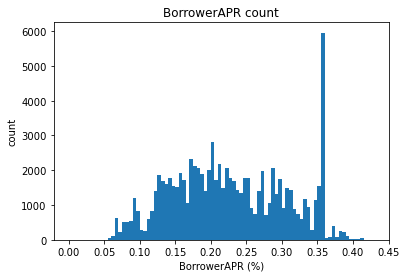

In [4]:
bins = np.arange(0, df_loan_2['BorrowerAPR'].max(), 0.005)
plt.hist(data = df_loan_2, x = 'BorrowerAPR', bins = bins)
plt.title('BorrowerAPR count')
plt.xlabel('BorrowerAPR (%)')
plt.ylabel('count')
plt.xticks(np.arange(0, df_loan_2['BorrowerAPR'].max()+0.05, 0.05));

Like what we see in the graph, BorrowerAPR count: There two exceptional high counts when BorrowerAPR are 0.35797% and 0.35643%.

### (Visualization 2)

####  BorrowerAPR vs. ProsperScore

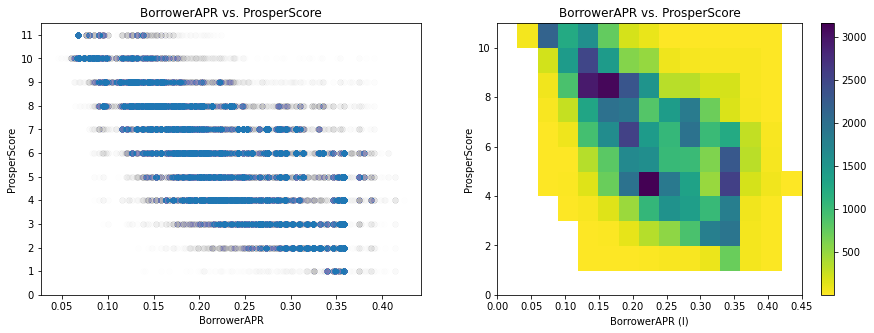

In [5]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = df_loan_3, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loan_3['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df_loan_3['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loan_3, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

People with higher rating tend to be more reliable and thus get lower interest rate for the borrower.

### (Visualization 3)

#### BorrowerAPR vs ProsperScore on each ProsperRatings

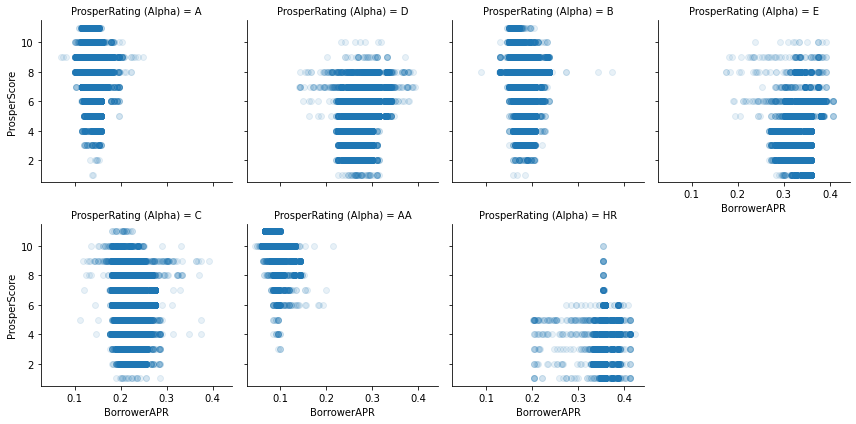

In [6]:
g = sb.FacetGrid(data = df_loan_3, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

plt.show()

The patterns show that the lowest respite (HR) for borrowers has the highest APR.

In [7]:
!jupyter nbconvert slide_deck_prosperLoan.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_prosperLoan.ipynb to slides
[NbConvertApp] Writing 441535 bytes to slide_deck_prosperLoan.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Lemtm\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Lemtm\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Lemtm\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Lemtm\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\Lemtm\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
